In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
dataset['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [2]:
fare_values = dataset.loc[dataset['Fare'].notnull(), 'Fare'].values
print(fare_values.shape)

(891,)


In [3]:
mean_fare = np.round(np.mean(fare_values))
print(mean_fare)

32.0


In [5]:
median_fare = np.median(fare_values)
print(median_fare)

14.4542


In [27]:
#Średnia i mediana różnią się dosyć znacząco, co znaczy, że w naszej bazie może znajdować się dużo outlierów
#W tym wypadku, ponieważ mediana jest mniejsza od średniej, znaczy to, że outliery mają wysokie wartości
#To znaczy, że kilka pasażerów zapłaciło niesamowicie drogie bilety w porównaniu z większością

In [6]:
mode_fare = stats.mode(fare_values)
print(mode_fare)

ModeResult(mode=np.float64(8.05), count=np.int64(43))


In [28]:
#Najczęściej występującą ceną biletu było 8.05, mniej niż średnia i mediana

In [8]:
q0 = np.quantile(fare_values, 0.0)
q1 = np.round(np.quantile(fare_values, 0.25))
q3 = np.round(np.quantile(fare_values, 0.75))
q4 = np.round(np.quantile(fare_values, 1.0))
print(f'Q0: {q0}')
print(f'Q1: {q1}')
print(f'Q2: {median_fare}')
print(f'Q3: {q3}')
print(f'Q4: {q4}')

Q0: 0.0
Q1: 8.0
Q2: 14.4542
Q3: 31.0
Q4: 512.0


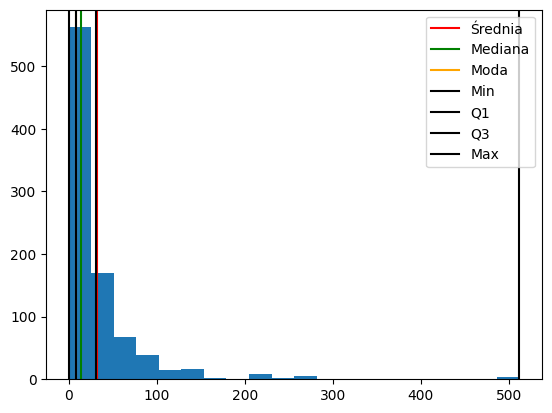

In [10]:
plt.hist(fare_values, bins=20)
plt.axvline(x = mean_fare, color='red', label = 'Średnia')
plt.axvline(x = median_fare, color='green', label = 'Mediana')
plt.axvline(x = mode_fare[0], color='orange', label = 'Moda')
plt.axvline(x = q0, color='black', label = 'Min')
plt.axvline(x = q1, color='black', label = 'Q1')
plt.axvline(x = q3, color='black', label = 'Q3')
plt.axvline(x = q4, color='black', label = 'Max')
plt.legend(loc='upper right')
plt.show()

In [29]:
#Mamy do czynienia z wysokim positive skew

In [11]:
range_fare = max(fare_values) - min(fare_values)
print(range_fare)

512.3292


In [12]:
iqr = q3 - q1
print(iqr)

23.0


In [20]:
dataset[dataset['Fare']>250]['Fare']

27     263.0000
88     263.0000
258    512.3292
311    262.3750
341    263.0000
438    263.0000
679    512.3292
737    512.3292
742    262.3750
Name: Fare, dtype: float64

In [31]:
#Z grafu oraz wyliczonych wartości można zauważyć, że zakres cen biletu jest niesamowicie duży
#Jedynie kilku gości zapłaciło więcej niż 250, w tym trzech, którzy zapłacili powyżej 263
#75% procent osób zapłaciło mniej niż 31 - to mniej niż średnia!
#Outliery niesamowicie zawyżają średnią

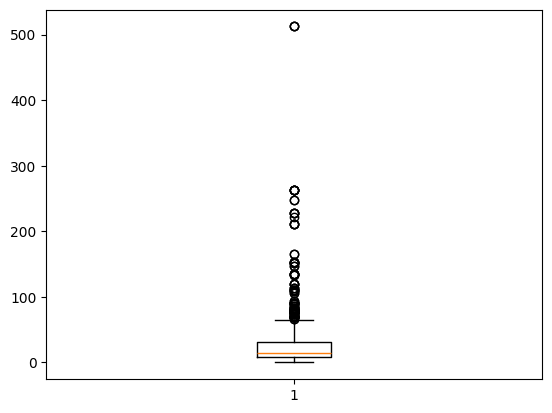

In [13]:
plt.boxplot(fare_values)
plt.show()

In [34]:
outliers = dataset[(dataset['Fare']>q3+1.5*iqr)]
outliers['Fare']

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

In [38]:
round(len(outliers) / len(dataset),3)*100

13.0

In [39]:
#W danych występuje wielki odsetek outlierów - aż 13%!

In [14]:
variance_fare = np.var(fare_values, ddof=1)
print(variance_fare)

2469.436845743116


In [24]:
standard_deviation_fare = np.std(fare_values, ddof=1)
print(standard_deviation_fare)

49.6934285971809


In [40]:
#Ponieważ średnia jest zawyżona, odchylenie standardowe jest bardzo duże

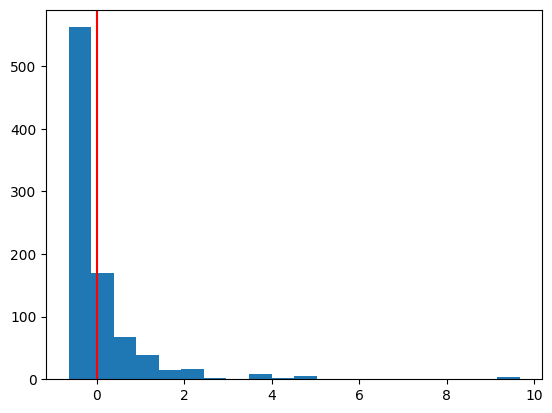

Średnia: 3.987332972840069e-18
Odchylenie standardowe: 1.0005616400330457


In [16]:
scaler_standardized = StandardScaler()
standardized_fare_values = scaler_standardized.fit_transform(fare_values.reshape(-1, 1))
plt.hist(standardized_fare_values, bins=20)
plt.axvline(x = standardized_fare_values.mean(), color='red', label = 'Średnia')
plt.show()
print(f'Średnia: {standardized_fare_values.mean()}')
print(f'Odchylenie standardowe: {np.std(standardized_fare_values, ddof=1)}')